# Minimal example of running ASTRA + ODL in colab

Installation takes some time (a few minutes) but only needs to be run once, after that you have a fully fledged GPU kernel for free.

Just make sure to turn on GPU by changing the runtime (runtime -> Change runtime types)

Credit to [FAIR](https://facebookresearch.github.io/TensorComprehensions/installation_colab_research.html) for the instructions and Daniel Otero for the example.

In [1]:
!apt install autotools-dev automake libtool
!pip install astra-toolbox

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  autoconf file libmagic-mgc libmagic1 libsigsegv2 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc gettext libtool-doc gcj-jdk
  m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev file libmagic-mgc libmagic1 libsigsegv2
  libtool m4
0 upgraded, 9 newly installed, 0 to remove and 29 not upgraded.
Need to get 1,551 kB of archives.
After this operation, 10.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 file amd64 1:5.32-2ubuntu0.4 [22.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsigsegv2 a

In [2]:
import astra

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from PIL import Image
import astra

%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(256, 256)


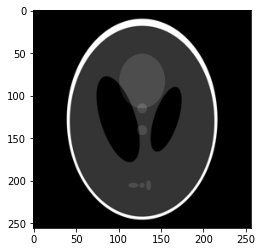

In [5]:
img = Image.open('drive/MyDrive/Диплом/SheppLogan_Phantom.png')

img = img.resize((256, 256))

img = np.asarray(img)
img = rgb2gray(img)
print(img.shape)
plt.imshow(img, cmap='gray')


#img = rgb2gray(np.reshape(plt.imread('SheppLogan_Phantom.png'), (256, 256)))
#plt.imshow(img)

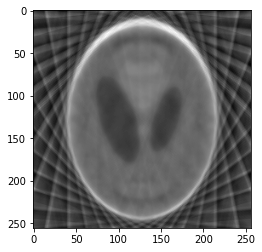

In [6]:
vol_geom = astra.create_vol_geom(256, 256)
angles = np.linspace(0, np.pi, 18)
proj_geom = astra.create_proj_geom('parallel', 1, 256, angles)
proj_id = astra.create_projector('linear', proj_geom, vol_geom)
sinogram_id, sino = astra.create_sino(img, proj_id)
recon_id = astra.data2d.create('-vol', vol_geom, 0)
cfg = astra.astra_dict('SIRT')
cfg['ProjectorId'] = proj_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ReconstructionDataId'] = recon_id
algorithm_id = astra.algorithm.create(cfg)
astra.algorithm.run(algorithm_id, 200)
#sirt_id = astra.mex_algorithm('create', cfg)
#astra.mex_algorithm('iterate', sirt_id, 100)
new_img = astra.data2d.get(recon_id)
plt.imshow(new_img, cmap='gray')


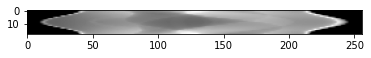

In [7]:
plt.imshow(sino, cmap='gray')

In [31]:
matrix_id = astra.projector.matrix(proj_id)
A = astra.matrix.get(matrix_id).astype(np.float)
#mat = astra.projector.projection_geometry(proj_id)
#mat['ProjectionAngles'].shape

In [32]:
import scipy.sparse
import scipy.sparse.linalg

In [33]:
print(type(A))

<class 'scipy.sparse.csr.csr_matrix'>


In [34]:
A.shape

(4608, 65536)

In [35]:
res = A.dot(img.reshape(256 * 256))

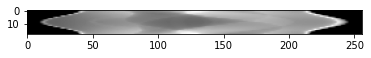

In [36]:
plt.imshow(res.reshape((-1, 256)), cmap='gray')

In [37]:
B = np.array([[2, 3], [4, 5]])
R = np.diag(1 / np.sum(B, axis=1))
C = np.diag(1 / np.sum(B, axis=0))

In [38]:
elem = [range(0, )]

In [39]:
print(C)
print(R)

[[0.16666667 0.        ]
 [0.         0.125     ]]
[[0.2        0.        ]
 [0.         0.11111111]]


In [40]:
C1 = np.array(1 / scipy.sparse.csr_matrix.sum(A, axis=0)).reshape(-1)
R1 = np.array(1 / scipy.sparse.csr_matrix.sum(A, axis=1)).reshape(-1)

In [41]:
C1.shape

(65536,)

In [42]:
elem = [np.arange(C1.shape[0]), np.arange(C1.shape[0])]
elem1 = [range(R1.shape[0]), range(R1.shape[0])]
C = scipy.sparse.csr_matrix((C1, (elem[0], elem[1])), shape=(len(C1), len(C1)))
R = scipy.sparse.csr_matrix((R1, (elem1[0], elem1[1])), shape=(len(R1), len(R1)))

In [43]:
b = sino.reshape(-1, 1)
print(type(b))

<class 'numpy.ndarray'>


In [44]:
print(C, R)

  (0, 0)	0.10079371104243888
  (1, 1)	0.09538115972124699
  (2, 2)	0.10149303784275227
  (3, 3)	0.10246624282495129
  (4, 4)	0.09961039952148824
  (5, 5)	0.09913039853443469
  (6, 6)	0.09966137717836313
  (7, 7)	0.10211750845926197
  (8, 8)	0.09743801658268339
  (9, 9)	0.09992886176052405
  (10, 10)	0.10156862940011877
  (11, 11)	0.09986754072161556
  (12, 12)	0.09839889101619549
  (13, 13)	0.10169040367730059
  (14, 14)	0.10043144089199364
  (15, 15)	0.10068469376283021
  (16, 16)	0.09512682684016846
  (17, 17)	0.10246597571770168
  (18, 18)	0.10246625729678391
  (19, 19)	0.1005501129719345
  (20, 20)	0.09851570693507077
  (21, 21)	0.09534159522991006
  (22, 22)	0.09209281127086445
  (23, 23)	0.09099263184487423
  (24, 24)	0.08918158568444488
  :	:
  (65511, 65511)	0.0891757043889504
  (65512, 65512)	0.09099600036486204
  (65513, 65513)	0.09210052413592387
  (65514, 65514)	0.09535038381736644
  (65515, 65515)	0.09851372819930973
  (65516, 65516)	0.10053630743391269
  (65517, 65517)	0.

In [45]:
print(C.shape, A.shape)

(65536, 65536) (4608, 65536)


In [46]:
scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(C, A.T), R)

<65536x4608 sparse matrix of type '<class 'numpy.float64'>'
	with 1893682 stored elements in Compressed Sparse Row format>

In [47]:
scipy.sparse.csc_matrix.dot(A, x)

NameError: ignored

In [48]:
print(A.shape, x.shape)

NameError: ignored

In [49]:
scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(C, A.T), R), b - scipy.sparse.csc_matrix.dot(A, x))

NameError: ignored

In [ ]:
Y = np.arange(12)
n = 3
m = 4
grad = np.zeros(n * m)
idx1 = np.arange(m, n * m)
idx2 = np.arange(n * m).reshape(n, m).T[1:].reshape(-1)
print(idx2)
grad[idx1] += 1 * ((Y[idx1] - Y[idx1 - m]) > 0) - 1 * ((Y[idx1] - Y[idx1 - m]) <= 0)
grad[idx1 - m] += -1 * ((Y[idx1] - Y[idx1 - m]) > 0) + 1 * ((Y[idx1] - Y[idx1 - m]) <= 0)
grad[idx2] += 1 * ((Y[idx2] - Y[idx2 - 1]) > 0) - 1 * ((Y[idx2] - Y[idx2 - 1]) <= 0)
grad[idx2 - 1] += -1 * ((Y[idx2] - Y[idx2 - 1]) > 0) + 1 * ((Y[idx2] - Y[idx2 - 1]) <= 0)
grad

[ 1  5  9  2  6 10  3  7 11]


array([-2., -1., -1.,  0., -1.,  0.,  0.,  1.,  0.,  1.,  1.,  2.])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from PIL import Image
import astra
import scipy.sparse
import scipy.sparse.linalg
import time

%matplotlib inline


def fast_calc_grad(Y, n=256, m=256):
    '''
    вычисляет градиент для матрицы ошибок
    params: 
    Y - текущий вектор из пикселей изображения
    n, m - размеры изображения
    return:
    TV-regularization gradient вектор
    '''
    Y = Y.reshape(-1)
    grad = np.zeros(n * m)
    idx1 = np.arange(m, n * m)
    idx2 = np.arange(n * m).reshape(n, m).T[1:].reshape(-1)
    grad[idx1] += 1 * ((Y[idx1] - Y[idx1 - m]) > 0) - 1 * ((Y[idx1] - Y[idx1 - m]) <= 0)
    grad[idx1 - m] += -1 * ((Y[idx1] - Y[idx1 - m]) > 0) + 1 * ((Y[idx1] - Y[idx1 - m]) <= 0)
    grad[idx2] += 1 * ((Y[idx2] - Y[idx2 - 1]) > 0) - 1 * ((Y[idx2] - Y[idx2 - 1]) <= 0)
    grad[idx2 - 1] += -1 * ((Y[idx2] - Y[idx2 - 1]) > 0) + 1 * ((Y[idx2] - Y[idx2 - 1]) <= 0)
    #print(grad.shape)
    return grad.reshape(-1, 1)


def fast_calc_grad_mu(Y, mu=0.1, n=256, m=256):
    '''
    params: 
    Y - текущий вектор из пикселей изображения
    n, m - размеры изображения
    mu - коэффициент аппроксимации |x| ~ \sqrt(x^2 + mu)
    return:
    TV-regularization gradient
    '''
    Y = Y.reshape(-1)
    grad = np.zeros(n * m)
    idx1 = np.arange(m, n * m)
    idx2 = np.arange(n * m).reshape(n, m).T[1:].reshape(-1)
    abs_grad1 = (Y[idx1] - Y[idx1 - m]) / (((Y[idx1] - Y[idx1 - m]) ** 2 + mu) ** 0.5)
    abs_grad2 = (Y[idx2] - Y[idx2 - 1]) / (((Y[idx2] - Y[idx2 - 1]) ** 2 + mu) ** 0.5)
    grad[idx1] += (1 * ((Y[idx1] - Y[idx1 - m]) > 0) - 1 * ((Y[idx1] - Y[idx1 - m]) <= 0)) * abs_grad1
    grad[idx1 - m] += (-1 * ((Y[idx1] - Y[idx1 - m]) > 0) + 1 * ((Y[idx1] - Y[idx1 - m]) <= 0)) * abs_grad1
    grad[idx2] += (1 * ((Y[idx2] - Y[idx2 - 1]) > 0) - 1 * ((Y[idx2] - Y[idx2 - 1]) <= 0)) * abs_grad2
    grad[idx2 - 1] += (-1 * ((Y[idx2] - Y[idx2 - 1]) > 0) + 1 * ((Y[idx2] - Y[idx2 - 1]) <= 0)) * abs_grad2
    return grad.reshape(-1, 1)


def show_img(x, iter, method, n=256, m=256):
    '''
    Show reconstructed image after iter iteration of method {SIRT, SIRT-reg, SIRT-reg-lambda}
    params:
    x - image
    n, m - image size
    iter - iteration number
    method - SIRT, SIRT-reg, SIRT-reg-lambda
    '''
    y = x.reshape((n, m))
    plt.imshow(y, cmap='gray')
    plt.title("{} after {} iter".format(method, iter))


def plot_sino(sino):
    '''
    Visulise sinogram
    '''
    plt.imshow(sino, cmap='gray')


def opt_SIRT(A, b, Y, n, m):
    return np.linalg.norm(b - A.dot(Y))


def opt_SIRT_reg(A, b, Y, n, m, alpha):
    syst = np.linalg.norm(b - A.dot(Y))
    Y = Y.reshape(-1)
    idx1 = np.arange(m, n * m)
    idx2 = np.arange(n * m).reshape(n, m).T[1:].reshape(-1)
    total_variation = alpha * (np.sum(np.abs(Y[idx1] - Y[idx1 - m])) + np.sum(np.abs(Y[idx2] - Y[idx2 - 1])))
    return syst + total_variation


def opt_SIRT_reg_mu(A, b, Y, n, m, alpha, mu):
    syst = np.linalg.norm(b - A.dot(Y))
    Y = Y.reshape(-1)
    idx1 = np.arange(m, n * m)
    idx2 = np.arange(n * m).reshape(n, m).T[1:].reshape(-1)
    total_variation_mu = alpha * (np.sum(((Y[idx1] - Y[idx1 - m]) ** 2 + mu) ** 0.5) + np.sum(((Y[idx2] - Y[idx2 - 1]) ** 2 + mu) ** 0.5))
    return syst + total_variation_mu


def grad_SIRT(backproj_matr, A, b, Y, n, m):
    return -backproj_matr.dot(b - A.dot(Y))


def grad_SIRT_reg(backproj_matr, A, b, Y, n, m, alpha):
    return -backproj_matr.dot(b - A.dot(Y)) + alpha * fast_calc_grad(Y, n, m)


def grad_SIRT_reg_mu(backproj_matr, A, b, Y, n, m, alpha, mu):
    return -backproj_matr.dot(b - A.dot(Y)) + alpha * fast_calc_grad_mu(Y, mu, n, m)


def find_optimal_lambda_SIRT(backproj_matr, A, b, Y, n, m):
    l = -1000
    r = 1000
    for i in range(40):
        m1 = l + (r - l) / 3
        m2 = r - (r - l) / 3
        grad1 = grad_SIRT(backproj_matr, A, b, Y, n, m)
        val1 = opt_SIRT(A, b, Y - m1 * grad1, n, m)
        grad2 = grad_SIRT(backproj_matr, A, b, Y, n, m)
        val2 = opt_SIRT(A, b, Y - m2 * grad2, n, m)
        if val1 < val2:
            r = m2
        else:
            l = m1
    return l


def find_optimal_lambda_SIRT_reg(backproj_matr, A, b, Y, n, m, alpha):
    l = -1000
    r = 1000
    for i in range(40):
        m1 = l + (r - l) / 3
        m2 = r - (r - l) / 3
        grad1 = grad_SIRT_reg(backproj_matr, A, b, Y, n, m, alpha)
        val1 = opt_SIRT_reg(A, b, Y - m1 * grad1, n, m, alpha)
        grad2 = grad_SIRT_reg(backproj_matr, A, b, Y, n, m, alpha)
        val2 = opt_SIRT_reg(A, b, Y - m2 * grad2, n, m, alpha)
        if val1 < val2:
            r = m2
        else:
            l = m1
    return l


def find_optimal_lambda_SIRT_reg_mu(backproj_matr, A, b, Y, n, m, alpha, mu):
    l = -1000
    r = 1000
    for i in range(40):
        m1 = l + (r - l) / 3
        m2 = r - (r - l) / 3
        grad1 = grad_SIRT_reg_mu(backproj_matr, A, b, Y, n, m, alpha, mu)
        val1 = opt_SIRT_reg_mu(A, b, Y - m1 * grad1, n, m, alpha, mu)
        grad2 = grad_SIRT_reg_mu(backproj_matr, A, b, Y, n, m, alpha, mu)
        val2 = opt_SIRT_reg_mu(A, b, Y - m2 * grad2, n, m, alpha, mu)
        if val1 < val2:
            r = m2
        else:
            l = m1
    return l


def SIRT(A, b, n=256, m=256, iter=200, threshold=1e-4, show_plots=True):
    '''
    params:
    A - матрица системы линейных уравнений(sparse-matrix)
    b - вектор проекций(sparse-matrix)
    n, m - размер изображения
    iter - количество итераций
    return:
    вектор пикселей изображения, 
    '''
    start = time.time()
    C1 = np.array(1 / scipy.sparse.csr_matrix.sum(A, axis=0)).reshape(-1)
    R1 = np.array(1 / scipy.sparse.csr_matrix.sum(A, axis=1)).reshape(-1)
    elem = [np.arange(C1.shape[0]), np.arange(C1.shape[0])]
    elem1 = [range(R1.shape[0]), range(R1.shape[0])]
    C = scipy.sparse.csr_matrix((C1, (elem[0], elem[1])), shape=(len(C1), len(C1)))
    R = scipy.sparse.csr_matrix((R1, (elem1[0], elem1[1])), shape=(len(R1), len(R1)))
    b = b.reshape(-1, 1)
    x = np.zeros((n * m, 1))
    backproj_matr = (C.dot(A.T)).dot(R)
    #x = np.zeros((256 * 256))
    for i in range(iter):
        y = x
        #backproj_matr = (C.dot(A.T)).dot(R)
        x = x + find_optimal_lambda_SIRT(backproj_matr, A, b, x, n, m) * backproj_matr.dot(b - A.dot(x))
        if np.linalg.norm(y - x) < threshold:
            break
        if i % 10 == 0 and show_plots:
            show_img(x, i, 'SIRT')
            plt.show()
    end = time.time()
    show_img(x, iter, 'SIRT')
    plt.show()
    print('Время работы SIRT: {} секунд'.format(end - start))
    return x


def SIRT_reg(A, b, n=256, m=256, alpha=0.02, iter=200, threshold=1e-4, show_plots=True):
    '''
    params:
    A - матрица системы линейных уравнений(sparse-matrix)
    b - вектор проекций(sparse-matrix)
    n, m - размер изображения
    alpha - коэффициент регуляризации
    iter - количество итераций
    return:
    вектор пикселей изображения
    '''
    start = time.time()
    C1 = np.array(1 / scipy.sparse.csr_matrix.sum(A, axis=0)).reshape(-1)
    R1 = np.array(1 / scipy.sparse.csr_matrix.sum(A, axis=1)).reshape(-1)
    elem = [np.arange(C1.shape[0]), np.arange(C1.shape[0])]
    elem1 = [range(R1.shape[0]), range(R1.shape[0])]
    C = scipy.sparse.csr_matrix((C1, (elem[0], elem[1])), shape=(len(C1), len(C1)))
    R = scipy.sparse.csr_matrix((R1, (elem1[0], elem1[1])), shape=(len(R1), len(R1)))
    b = b.reshape(-1, 1)
    x = np.zeros((n * m, 1))
    backproj_matr = (C.dot(A.T)).dot(R)
    #x = np.zeros((256 * 256))
        #x += scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(C, A.T), R), b - scipy.sparse.csc_matrix.dot(A, scipy.sparse.csc_matrix(x)))
    #x += -alpha * calc_grad_mu(x, 0.1)
    for i in range(iter):
        #backproj_matr = (C.dot(A.T)).dot(R)
        y = x
        coef = find_optimal_lambda_SIRT_reg(backproj_matr, A, b, x, n, m, alpha)
        x = x + coef * backproj_matr.dot(b - A.dot(x))
        x += coef * -alpha * fast_calc_grad(x)
        if np.linalg.norm(y - x) < threshold:
            break
        if i % 10 == 0 and show_plots:
            show_img(x, i, 'SIRT-reg')
            plt.show()
    end = time.time()
    show_img(x, iter, 'SIRT-reg')
    plt.show()
    print('Время работы SIRT с TV-регуляризацией: {} секунд'.format(end - start))
    return x


def SIRT_reg_mu(A, b, n=256, m=256, alpha=0.01, mu=0.01, iter=200, threshold=1e-4, show_plots=False):
    '''
    params:
    A - матрица системы линейных уравнений(sparse-matrix)
    b - вектор проекций(sparse-matrix)
    n, m - размер изображения
    alpha - коэффициент регуляризации
    mu - коэффициент сглажиания
    iter - количество итераций
    return:
    вектор пикселей изображения
    '''
    start = time.time()
    C1 = np.array(1 / scipy.sparse.csr_matrix.sum(A, axis=0)).reshape(-1)
    R1 = np.array(1 / scipy.sparse.csr_matrix.sum(A, axis=1)).reshape(-1)
    elem = [np.arange(C1.shape[0]), np.arange(C1.shape[0])]
    elem1 = [range(R1.shape[0]), range(R1.shape[0])]
    C = scipy.sparse.csr_matrix((C1, (elem[0], elem[1])), shape=(len(C1), len(C1)))
    R = scipy.sparse.csr_matrix((R1, (elem1[0], elem1[1])), shape=(len(R1), len(R1)))
    b = b.reshape(-1, 1)
    x = np.zeros((n * m, 1))
    backproj_matr = (C.dot(A.T)).dot(R)
    #x = np.zeros((256 * 256))
        #x += scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(C, A.T), R), b - scipy.sparse.csc_matrix.dot(A, scipy.sparse.csc_matrix(x)))
    #x += -alpha * calc_grad_mu(x, 0.1)
    for i in range(iter):
        #lamb = np.argmin(np.linspace(-1, 1, 1000))
        y = x
        coef = find_optimal_lambda_SIRT_reg_mu(backproj_matr, A, b, x, n, m, alpha, mu)
        #backproj_matr = (C.dot(A.T)).dot(R)
        x = x + coef * backproj_matr.dot(b - A.dot(x))
        x += coef * (-alpha) * fast_calc_grad_mu(x, mu)
        if np.linalg.norm(y - x) < threshold:
            break
        if i % 10 == 0 and show_plots:
            show_img(x, i, 'SIRT-reg-mu')
            plt.show()
    end = time.time()
    show_img(x, iter, 'SIRT-reg-mu')
    plt.show()
    print('Время работы SIRT с TV-регуляризацией и сглаживанием: {} секунд'.format(end - start))
    return x


def get_A_b(img, angles=18, det_row_count=1, det_col_count=256):
    '''
    Возвращает матрицу системы линейных уравнений
    params:
    img - изображение
    angles - количество углов проекций
    det_row_count - расстояние между 2 проекциями детектора
    det_col_count - количество измерений для каждого угла
    return:
    A - system matrix
    b - projection vector
    '''
    vol_geom = astra.create_vol_geom(img.shape[0], img.shape[1])
    angles = np.linspace(0, np.pi, angles)
    proj_geom = astra.create_proj_geom('parallel', det_row_count, det_col_count, angles)
    proj_id = astra.create_projector('linear', proj_geom, vol_geom)
    matrix_id = astra.projector.matrix(proj_id)
    A = astra.matrix.get(matrix_id).astype(np.float)
    sinogram_id, sino = astra.create_sino(img, proj_id)
    return A, sino


def prepare_image(img, n, m):
    '''
    Resize image to nxm and gray-scale it
    '''
    img = img.resize((n, m))
    img = np.asarray(img)
    img = rgb2gray(img)
    return img


def SIRT_libr(img, angles=18, det_row_count=1, det_col_count=256):
    '''
    Стандартный библиотечный SIRT
    '''
    vol_geom = astra.create_vol_geom(img.shape[0], img.shape[1])
    angles = np.linspace(0, np.pi, angles)
    proj_geom = astra.create_proj_geom('parallel', det_row_count, det_col_count, angles)
    proj_id = astra.create_projector('linear', proj_geom, vol_geom)
    sinogram_id, sino = astra.create_sino(img, proj_id)
    start = time.time()
    recon_id = astra.data2d.create('-vol', vol_geom, 0)
    cfg = astra.astra_dict('SIRT')
    cfg['ProjectorId'] = proj_id
    cfg['ProjectionDataId'] = sinogram_id
    cfg['ReconstructionDataId'] = recon_id
    algorithm_id = astra.algorithm.create(cfg)
    astra.algorithm.run(algorithm_id, 200)
    new_img = astra.data2d.get(recon_id)
    end = time.time()
    plt.title('Стандартный SIRT')
    plt.imshow(new_img, cmap='gray')
    plt.show()
    print('Время работы SIRT из стандартной библиотеки: {} секунд'.format(end - start))


def phantom_test(angles=18, det_row_count=1, det_col_count=256, alpha=0.01, mu=0.1):
    img = Image.open('drive/MyDrive/Диплом/SheppLogan_Phantom.png') #path to image
    img = prepare_image(img, 256, 256)
    print(img.min(), img.max())
    A, b = get_A_b(img, angles, det_row_count, det_col_count)
    plt.title('Фантом')
    plt.imshow(img, cmap='gray')
    plt.show()
    plt.title('Синограмма')
    plot_sino(b)
    plt.show()
    SIRT_libr(img)
    #SIRT(A, b)
    SIRT_reg(A, b)
    SIRT_reg_mu(A, b)
    

0.0 1.0


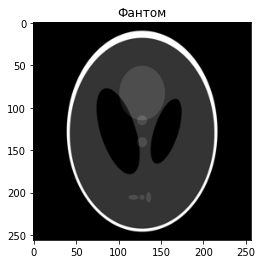

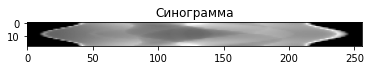

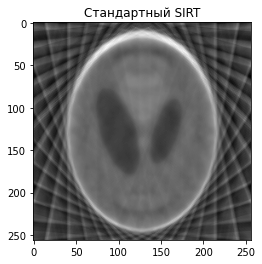

Время работы SIRT из стандартной библиотеки: 3.0554072856903076 секунд


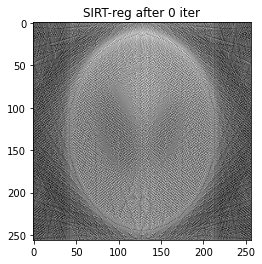

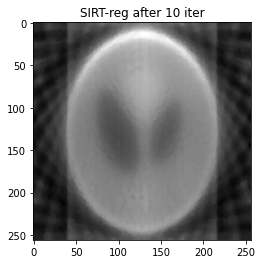

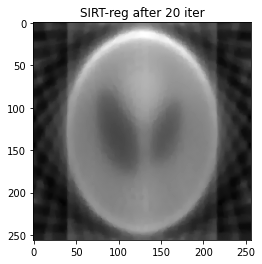

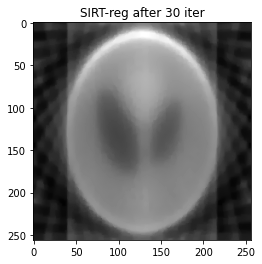

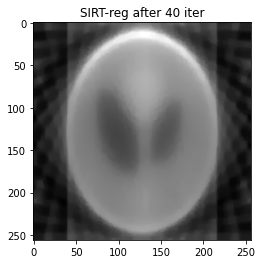

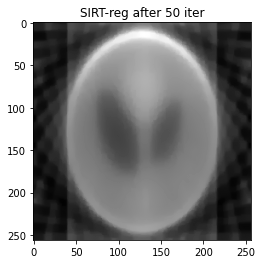

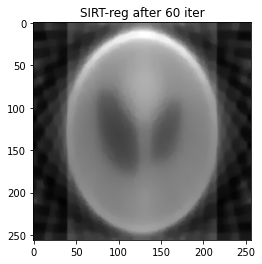

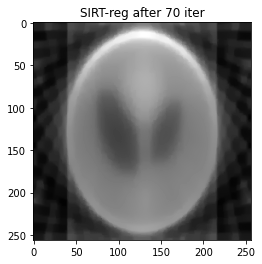

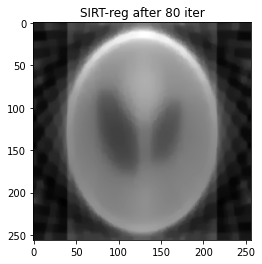

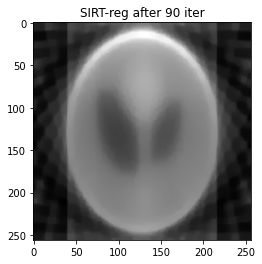

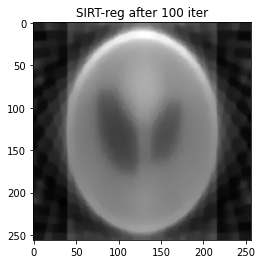

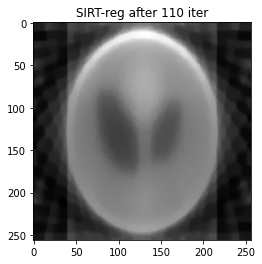

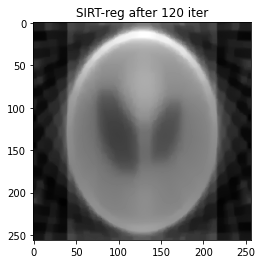

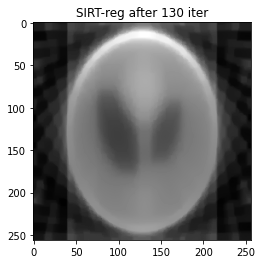

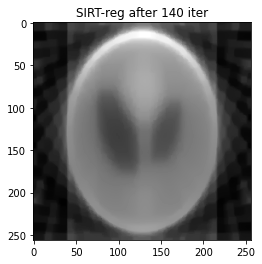

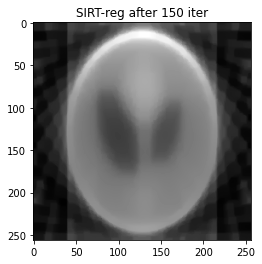

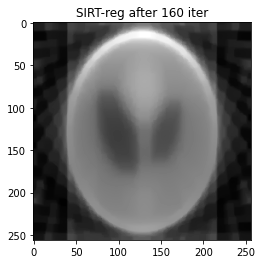

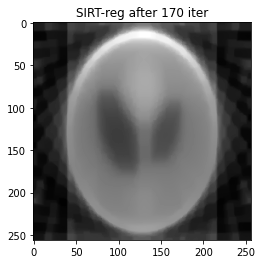

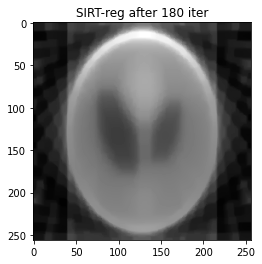

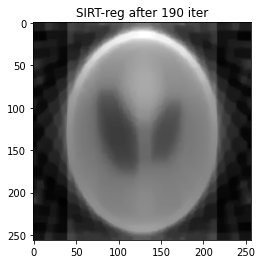

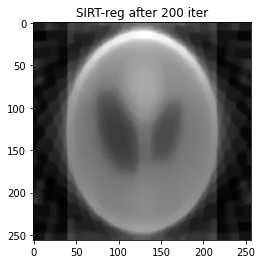

Время работы SIRT с TV-регуляризацией: 457.94054913520813 секунд


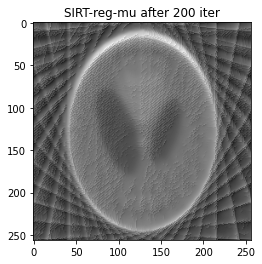

Время работы SIRT с TV-регуляризацией и сглаживанием: 72.49027180671692 секунд


In [ ]:
phantom_test()

In [ ]:
def calc_grad(x):
    #print(x.shape)
    y = x.reshape((256, 256))
    grad = np.zeros((256, 256))
    for i in range(255):
        for j in range(256):
            if y[i][j] - y[i - 1][j] > 0:
                grad[i][j] += 1
                grad[i - 1][j] -= 1
            else:
                grad[i][j] -= 1
                grad[i - 1][j] += 1
    for i in range(256):
        for j in range(255):
            if y[i][j] - y[i][j - 1] > 0:
                grad[i][j] += 1
                grad[i][j - 1] -= 1
            else:
                grad[i][j] -= 1
                grad[i][j - 1] += 1
    return grad.reshape((256 * 256, 1))


def calc_grad_mu(x, mu):
    y = x.reshape((256, 256))
    grad = np.zeros((256, 256))
    for i in range(255):
        for j in range(256):
            gr = (y[i][j] - y[i - 1][j]) / (((y[i][j] - y[i - 1][j]) ** 2 + mu) ** 0.5)
            if y[i][j] - y[i - 1][j] > 0:
                grad[i][j] += gr
                grad[i - 1][j] -= gr
            else:
                grad[i][j] -= gr
                grad[i - 1][j] += gr
    for i in range(256):
        for j in range(255):
            gr = (y[i][j] - y[i][j - 1]) / (((y[i][j] - y[i][j - 1]) ** 2 + mu) ** 0.5)
            if y[i][j] - y[i][j - 1] > 0:
                grad[i][j] += gr
                grad[i][j - 1] -= gr
            else:
                grad[i][j] -= gr
                grad[i][j - 1] += gr
    return grad.reshape((256 * 256), 1)


def calc_lambda(A, b, x):
    grad = calc_grad(x)

In [ ]:
x = scipy.sparse.csc_matrix((256 * 256, 1))
#x = np.zeros((256 * 256))
for i in range(200):
    print(i)
    #print("!!!!")
    #z = scipy.sparse.csc_matrix.toarray(x)
    #y = - scipy.sparse.csc_matrix(calc_grad(scipy.sparse.csc_matrix.toarray(x)))
    x += scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(C, A.T), R), b - scipy.sparse.csc_matrix.dot(A, x))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


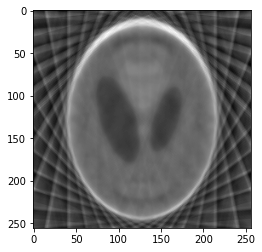

In [ ]:
y = np.array(x).reshape(256, 256)
plt.imshow(y, cmap='gray')

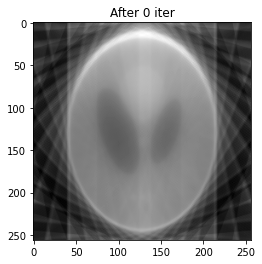

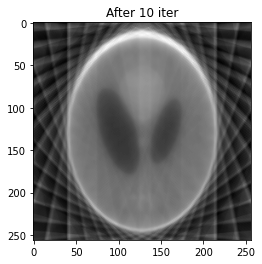

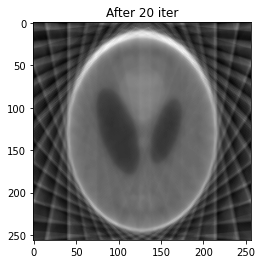

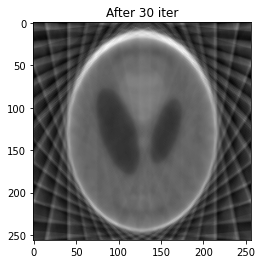

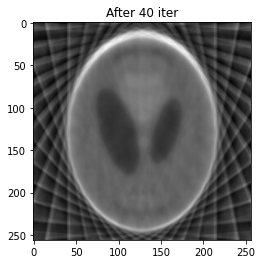

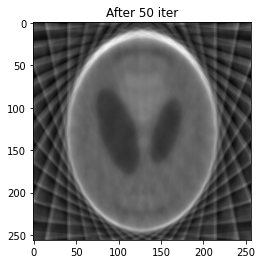

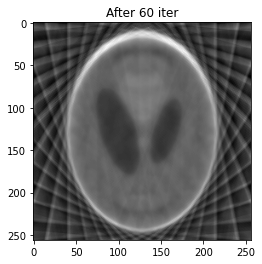

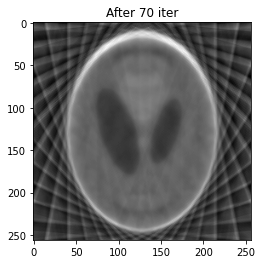

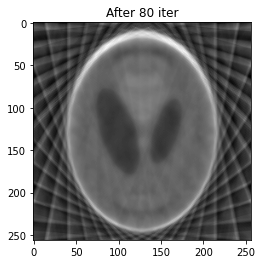

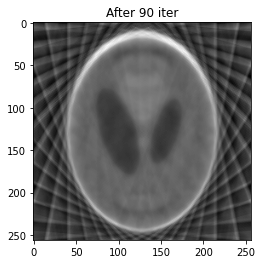

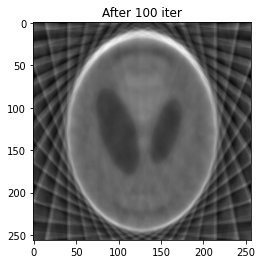

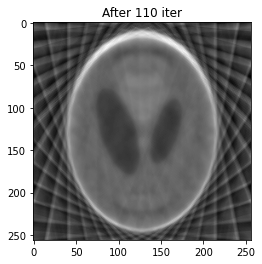

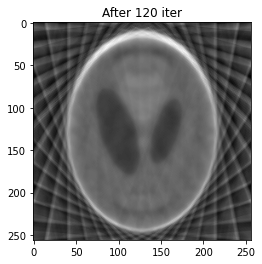

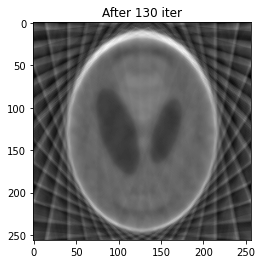

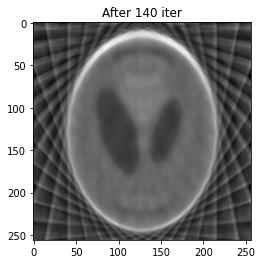

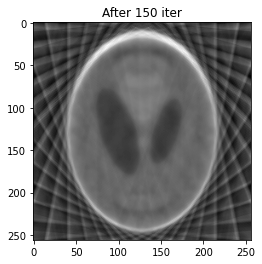

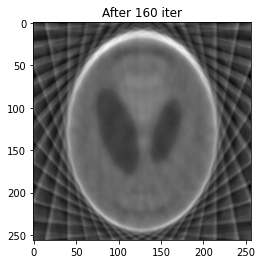

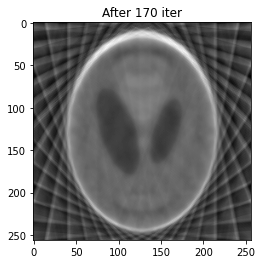

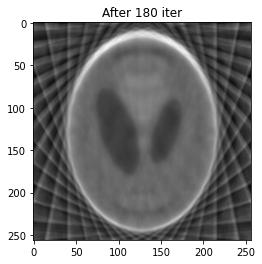

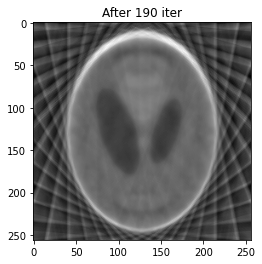

In [ ]:
x = np.zeros((256 * 256, 1))
alpha = 0.1
#x = np.zeros((256 * 256))
for i in range(200):
    #print(i)
    #z = scipy.sparse.csc_matrix.toarray(x)
    #y = - scipy.sparse.csc_matrix(calc_grad(scipy.sparse.csc_matrix.toarray(x)))
    #scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(C, A.T), R)
    backproj_matr = (C.dot(A.T)).dot(R)
    x = x + backproj_matr.dot(b - A.dot(x))
    if i % 10 == 0:
        show_img(x, i)
        plt.show()
    #x += scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(C, A.T), R), b - scipy.sparse.csc_matrix.dot(A, scipy.sparse.csc_matrix(x)))
    #x += -alpha * calc_grad(x)

In [ ]:
def show_img(x, iter=0):
    y = x.reshape((256, 256))
    plt.imshow(y, cmap='gray')
    plt.title("After {} iter".format(iter))

In [ ]:
#

[[ 3.20491656e-04  1.84507160e-01 -6.79669780e-03 ...  2.05742613e-01
  -1.85282287e-01  2.05158519e-02]
 [-1.05410228e-02 -3.06863350e-02  1.75541243e-01 ... -2.09778784e-01
   1.99589213e-01  7.79451259e-03]
 [-9.47648287e-03  1.66125733e-01 -4.20696896e-02 ...  1.77150781e-01
  -6.44957835e-03  2.06209086e-01]
 ...
 [ 9.78000854e-03  1.86912308e-01 -2.95871612e-02 ...  1.95522629e-01
  -1.87230248e-01 -1.75730310e-01]
 [-1.94028749e-01 -2.16555609e-02  1.77734825e-01 ... -1.96694655e-01
   1.47010566e-02  2.85245653e-02]
 [-1.79339449e-03  1.79995165e-01 -1.07989576e-02 ...  1.34114266e-04
   2.11763774e-01  2.59680282e-02]]


In [ ]:
x = np.zeros((256 * 256, 1))
alpha = 0.01
#x = np.zeros((256 * 256))
for i in range(200):
    print(i)
    #print("!!!!")
    #z = scipy.sparse.csc_matrix.toarray(x)
    #y = - scipy.sparse.csc_matrix(calc_grad(scipy.sparse.csc_matrix.toarray(x)))
    x += scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(C, A.T), R), b - scipy.sparse.csc_matrix.dot(A, scipy.sparse.csc_matrix(x)))
    x += -alpha * calc_grad_mu(x, 0.1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


In [ ]:
y = np.array(x).reshape(256, 256)

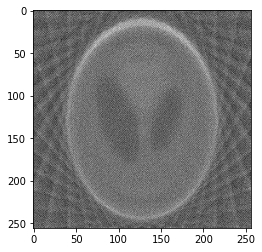

In [ ]:
y = np.array(x).reshape(256, 256)
plt.imshow(y, cmap='gray')

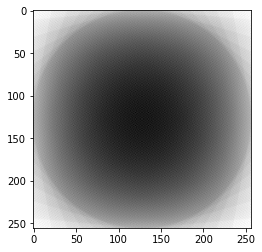

In [ ]:
y = np.array(x).reshape(256, 256)
plt.imshow(y, cmap='gray')

In [ ]:
x = scipy.sparse.csc_matrix((256 * 256, 1))
#x = np.zeros((256 * 256))
for i in range(200):
    print(i)
    #print("!!!!")
    #z = scipy.sparse.csc_matrix.toarray(x)
    #y = - scipy.sparse.csc_matrix(calc_grad(scipy.sparse.csc_matrix.toarray(x)))
    x = 0.1 * scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(A.T, R), b - scipy.sparse.csc_matrix.dot(A, x))
    print(x)

0
[[0.09211164]
 [0.0986869 ]
 [0.09124958]
 ...
 [0.09213092]
 [0.1001852 ]
 [0.09386027]]
1
[[-0.10476151]
 [-0.1113703 ]
 [-0.10533468]
 ...
 [-0.10012938]
 [-0.10546898]
 [-0.0988387 ]]
2
[[0.25112832]
 [0.26736728]
 [0.24971665]
 ...
 [0.25123437]
 [0.26949592]
 [0.25346314]]
3
[[-0.37154457]
 [-0.39468144]
 [-0.37127439]
 ...
 [-0.36699983]
 [-0.38974252]
 [-0.36655715]]
4
[[0.70909057]
 [0.75393839]
 [0.70632305]
 ...
 [0.70857386]
 [0.75682991]
 [0.71217692]]
5
[[-1.16233102]
 [-1.23501358]
 [-1.15976913]
 ...
 [-1.15600826]
 [-1.23062045]
 [-1.15789774]]
6
[[2.07672803]
 [2.20734836]
 [2.07002334]
 ...
 [2.07258595]
 [2.21059397]
 [2.08020536]]
7
[[-3.52862226]
 [-3.74975741]
 [-3.51926301]
 ...
 [-3.51561239]
 [-3.7455383 ]
 [-3.52444457]]
8
[[6.17136974]
 [6.55890079]
 [6.15291176]
 ...
 [6.15534893]
 [6.56212446]
 [6.17498011]]
9
[[-10.61422842]
 [-11.27995248]
 [-10.5845363 ]
 ...
 [-10.58043724]
 [-11.27545899]
 [-10.61005524]]
10
[[18.43280767]
 [19.58969594]
 [18.379168

[[nan]
 [nan]
 [nan]
 ...
 [nan]
 [nan]
 [nan]]


In [ ]:
def 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from PIL import Image
import astra
import scipy.sparse
import scipy.sparse.linalg

%matplotlib inline


path = input()
#read image
M_img = Image.open(path)
#prepare image: white-black + resize
M_img = M_img.resize((256, 256))
M_img = np.asarray(M_img)
M_img = rgb2gray(M_img)
#create image geometry
vol_geom = astra.create_vol_geom(256, 256)
#create measurements geometry
angles = np.linspace(0, np.pi, 360)
proj_geom = astra.create_proj_geom('parallel', 1, 256, angles)
proj_id = astra.create_projector('linear', proj_geom, vol_geom)
#get sinogram (\rho, \phi) parametrization
sinogram_id, G_sinogram = astra.create_sino(M_img, proj_id)
#create reconstruction object with zeros initialization
recon_id = astra.data2d.create('-vol', vol_geom, 0)
#using SIRT reconstruction method
cfg = astra.astra_dict('SIRT')
cfg['ProjectorId'] = proj_id
cfg['ProjectionDataId'] = sinogram_id
cfg['ReconstructionDataId'] = recon_id
algorithm_id = astra.algorithm.create(cfg)
#run 200 iterations of SIRT algorithm 
astra.algorithm.run(algorithm_id, 200)
#get reconstruct image
astra_img = astra.data2d.get(recon_id)
plt.imshow(astra_img, cmap='gray')
#Now let's implement own SIRT
#get matrix of linear system A_lines
matrix_id = astra.projector.matrix(proj_id)
A_lines = astra.matrix.get(matrix_id).astype(np.float)
#matrix A is sparse, we use scipy.sparse library
#calculate R, C matrices
C1 = np.array(1 / scipy.sparse.csr_matrix.sum(A, axis=0)).reshape(-1)
R1 = np.array(1 / scipy.sparse.csr_matrix.sum(A, axis=1)).reshape(-1)
C = scipy.sparse.csr_matrix((C1, (range(len(C1)), range(len(C1)))), shape=(len(C1), len(C1)))
R = scipy.sparse.csr_matrix((R1, (range(len(R1)), range(len(R1)))), shape=(len(R1), len(R1)))
G = G_sinogram.reshape(-1)
#initialize matrix M
M = scipy.sparse.csc_matrix((256 * 256, 1))
for i in range(200):
    M += scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(scipy.sparse.csc_matrix.dot(C, A.T), R), G - scipy.sparse.csc_matrix.dot(A, M))


In [14]:
#encoding: utf-8
from __future__ import division
import numpy as np

def sino_to_lino(sino, ang, N, r=5):
    """
    Преобразование синограммы в четыре составляющих линограммы.  
    :param sino: Исходная синограмма
    :param ang: Углы измерения (в градусах)
    :param N: Линейный размер реконструируемого изображения
    :param r: Отклонение от границы сектора линогаммы, учитываемое при интерполяции 
    данных
    """
    print(sino.shape)
    if r:
        sino = np.pad(sino, ((0, 0), (r, r)), mode='reflect')
        print(sino.shape)
        ang = np.hstack((-ang[r:0:-1], ang, -ang[-r::1]))
        index_hp = (ang >= 45 - r) & (ang <= 90 + r)
        index_hn = (ang >= 90 - r) & (ang <= 135 + r)
        index_vp = (ang >= 0) & (ang <= 45 + r)
        index_vn = (ang >= 135 - r) & (ang <= 180 + r)
        print(index_hp)
    else:
        raise ValueError('r must be grate than 0, given {}'.format(r))
    
    pn = sino.shape[0]
    r = np.arange(-pn // 2, pn // 2)

    # hp
    index = index_hp
    sino_hp = sino[:, index]
    sino_new = np.zeros((2 * N, sino_hp.shape[1]))
    t = N / np.tan(np.deg2rad(ang[index]))
    for j in np.arange(sino_hp.shape[1]):
        sino_new[:, j] = np.interp(np.arange(-N, N), r * np.sqrt(t[j] ** 2 + N ** 2) / N + N / 2 - t[j] / 2 + 1,
                                   sino_hp[:, j])
    hp = np.zeros((2 * N, N))
    for i in np.arange(2 * N):
        hp[i - N, :] = np.interp(np.arange(0, N), t[::-1], sino_new[i, ::-1])

    # hn
    index = index_hn
    sino_hn = sino[:, index]
    sino_new = np.zeros((2 * N, sino_hn.shape[1]))
    t = N / np.tan(np.deg2rad(ang[index]))
    for j in np.arange(sino_hn.shape[1]):
        sino_new[:, j] = np.interp(np.arange(-N, N), r * np.sqrt(t[j] ** 2 + N ** 2) / N - t[j] / 2 - N / 2 + 1,
                                   sino_hn[:, j])
    hn = np.zeros((2 * N, N))
    for i in np.arange(2 * N):
        hn[i, :] = np.interp(np.arange(0, N), -t, sino_new[i, :])

    # vp
    index = index_vp
    sino_vp = sino[:, index]
    sino_new = np.zeros((2 * N, sino_vp.shape[1]))
    t = N * np.tan(np.deg2rad(ang[index]))
    for j in np.arange(sino_vp.shape[1]):
        sino_new[:, j] = np.interp(np.arange(-N, N), (r * np.sqrt(t[j] ** 2 + N ** 2) / N - N / 2 + t[j] / 2),
                                   sino_vp[:, j])
    vp = np.zeros((2 * N, N))
    for i in np.arange(2 * N):
        vp[i - N, :] = np.interp(np.arange(0, N), t, sino_new[i, :])
    vp = vp[::-1, :]

    # vn
    index = index_vn
    sino_vn = sino[:, index]
    sino_new = np.zeros((2 * N, sino_vn.shape[1]))
    t = N * np.tan(np.deg2rad(ang[index]))
    for j in np.arange(sino_vn.shape[1]):
        sino_new[:, j] = np.interp(np.arange(-N, N) + 1,
                                   -(r * np.sqrt(t[j] ** 2 + N ** 2) / N + N / 2 + t[j] / 2)[::-1], sino_vn[:, j])
    vn = np.zeros((2 * N, N))
    for i in np.arange(2 * N):
        vn[i, :] = np.interp(np.arange(0, N), -t[::-1], sino_new[i, ::-1])

    k = 1 + np.arange(N) ** 2 / (N - 1) ** 2
    return hp / k, hn / k, vp / k, vn / k


def fht2(im, sign):
    """
    Вычислние быстрого преобразования Хафа для преимущественно горизонтальных прямых. Для нахождени БПХ для
    преимущественно вертикальных прямых используется fht2(im.T, sign). Подробное описание
    Ершов, Е. И., Терехин, А. П., & Николаев, Д. П. (2017).
    Обобщение быстрого преобразования Хафа для трехмерных изображений.
    Информационные процессы, 17(4), 294-308.
    :param im: исходное изображение
    :param sign: 1 для прямых с уклон вверх, -1 - для прямых с уклоном вниз
    """
    m, n = im.shape
    n0 = int(np.round(n / 2))
    if n < 2:
        h = im
    else:
        h = mergeHT(fht2(im[:, 0:n0], sign), fht2(im[:, n0::], sign), sign)
    return h


def mergeHT(h0, h1, sign):
    """
    Вспомогательная функция вычисления БПХ.
    """
    m, n0 = h0.shape
    n = 2 * n0
    h = np.zeros((m, n))
    r0 = (n0 - 1) / (n - 1)
    for t in np.arange(n):
        t0 = int(np.around(t * r0))
        s = int(sign * (t - t0))
        h[:, t] = h0[:, t0] + np.hstack((h1[s:m, t0], h1[0:s, t0]))
    return h


def fht(im):
    """
    Вычислние быстрого преобразования Хафа для всех четырех типов прямых. 
    Подробное описание
    Ершов, Е. И., Терехин, А. П., & Николаев, Д. П. (2017).
    Важно! Для точного восстановления необходимо, чтобы Хаф-образы сожержали полные диапазон 
    углов (t=-N..N-1), а не были рекурсивно замкнуты, как в случае применения функции fht2.
    """
    N = im.shape[0]

    im_pad_h = np.pad(im, ((0, N), (0, 0)), mode='constant')
    im_pad_v = np.pad(im, ((0, 0), (0, N)), mode='constant')
    k = np.sqrt(1 + np.arange(N) ** 2 / (N - 1) ** 2)

    hp = fht2(im_pad_h, 1)
    hn = fht2(im_pad_h, -1)
    vp = fht2(im_pad_v.T, 1)
    vn = fht2(im_pad_v.T, -1)
    return hp, hn, vp, vn


def ifht(hp, hn, vp, vn):
    """
    Обратное проецирование с помощью БПХ. Входные данные в формате БПХ. Для применения к синограмме необходимо
    предварительно выполнить смену координат и интерполяцию для приведения к нужной сетке.
    (Ершов, Е. И., Терехин, А. П., & Николаев, Д. П. (2017).
    Обобщение быстрого преобразования Хафа для трехмерных изображений.
    Информационные процессы, 17(4), 294-308.)
    Важно! Для точного восстановления необходимо, чтобы Хаф-образы сожержали полные диапазон 
    углов (t=-N..N-1), а не были рекурсивно замкнуты, как в случае применения функции fht2.
    :param hp: БПХ для преимущественно горизонтальных прямых с уклоном вверх
    :param hn: БПХ для преимущественно горизонтальных прямых с уклоном вниз
    :param vp: БПХ для преимущественно вертикальных прямых с уклоном вправо
    :param vn: БПХ для преимущественно вертикальных прямых с уклоном влево
    """
    N = hp.shape[1]

    hpi = fht2(hp, -1)
    hni = fht2(hn, 1)
    vpi = fht2(vp, -1).T
    vni = fht2(vn, 1).T

    return (hpi[:N, :N] + hni[:N, :N] + vpi[:N, :N] + vni[:N, :N]) / N

In [59]:
hp, hn, vp, vn = sino_to_lino(sino.T, angles * 180 / np.pi, 256)

(256, 18)
(256, 28)
[False False False False False False False False False  True  True  True
  True  True False False False False False False False False False False
 False False False False]


In [60]:
print(hp, hn, vp, vn)

[[31.03110819 31.03063098 31.02919943 ... 21.24647646 21.24864972
  21.25047923]
 [36.3650736  36.36451436 36.36283675 ... 21.4765418  21.48200643
  21.48709801]
 [35.81719687 35.81664606 35.81499372 ... 21.52862577 21.53479421
  21.54058329]
 ...
 [ 0.76787748  0.76786567  0.76783025 ... 19.58023718 19.56175448
  19.54311534]
 [ 6.51295706  6.5128569   6.51255644 ... 20.12086815 20.10957822
  20.09806723]
 [19.35789779 19.3576001  19.35670707 ... 20.78998715 20.78694643
  20.78360979]] [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[ 0.          0.          0.         ... 23.56630386 23.47406962
  23.38219494]
 [ 0.          0.          0.         ... 22.79389103 22.70467987
  22.6158165 ]
 [ 0.          0.          0.         ... 21.72019357 21.63518467
  21.55050716]
 ...
 [ 0.          0.          0.         ... 24.05151408 23.95738081
  23.86361451]
 [ 0.          0.      

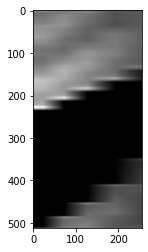

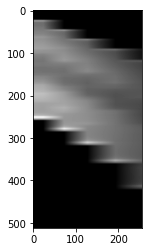

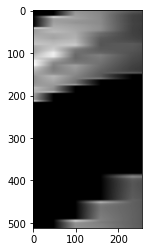

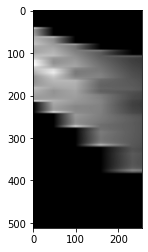

In [61]:
plt.imshow(hp, cmap='gray')
plt.show()
plt.imshow(hn, cmap='gray')
plt.show()
plt.imshow(vp, cmap='gray')
plt.show()
plt.imshow(vn, cmap='gray')
plt.show()

In [62]:
sino1 = ifht(hp, hn, vp, vn)

In [67]:
print(C.shape)

(65536, 65536)


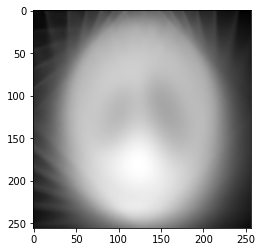

In [68]:
plt.imshow(sino1, cmap='gray')

In [64]:
sino

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)